In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [3]:
X

array([[ 8.74559254, -9.5767219 ],
       [-0.73649781, -8.6985817 ],
       [-1.44269514, -7.19926642],
       ...,
       [ 1.82433045,  3.49755174],
       [-2.38093417, -9.3316054 ],
       [ 1.15743589,  4.40583326]])

In [4]:
y

array([2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2,
       2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 1,
       0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2,
       0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1,
       2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2,
       1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0,
       1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 2,
       1, 1, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 1,
       0, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0,

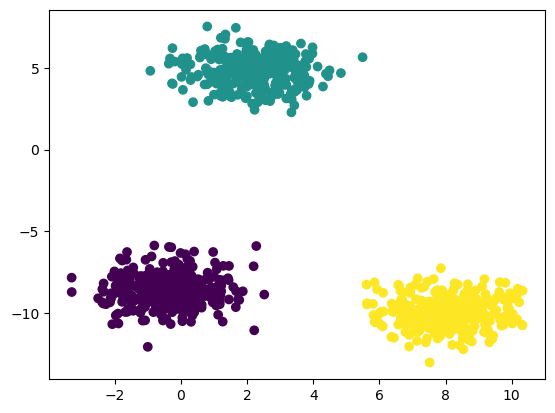

In [5]:
plt.scatter(X[:,0],X[:,1], c=y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from sklearn.cluster import KMeans

In [8]:
## Elbow method to select k value
wcss = []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\manal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\manal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\manal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\manal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

In [9]:
wcss

[39304.60470071015,
 9437.081903501445,
 1259.0120211041549,
 1091.875797811635,
 931.075140381893,
 797.0319211510669,
 711.9192730605367,
 628.2727353957886,
 550.4508477176664,
 509.81894548845065]

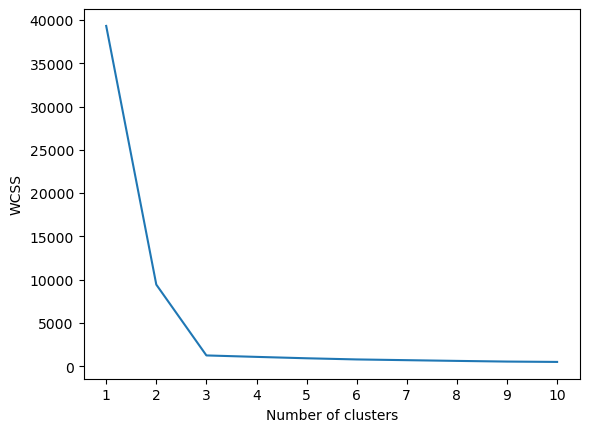

In [12]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
kmeans=KMeans(n_clusters=3, init="k-means++")

In [16]:
y_labels=kmeans.fit_predict(X_train)

C:\Users\manal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


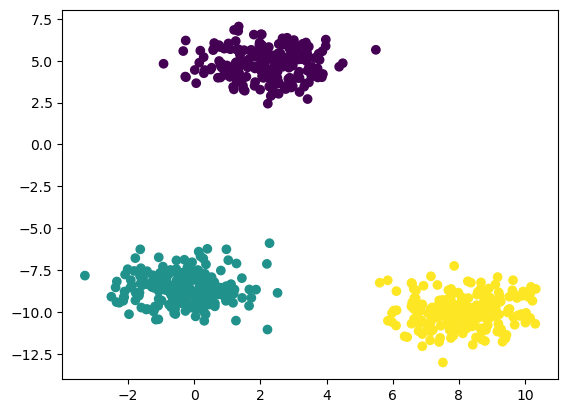

In [17]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_labels)

In [18]:
## for large data its hard to find elbow contant point so sklearn have one method to do it 
## knee locater
### !pip install kneed

In [19]:
from kneed import KneeLocator
k1=KneeLocator(range(1,11), wcss, curve='convex',direction='decreasing')
k1.elbow

3

In [20]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [22]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\manal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\manal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\manal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\manal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

In [23]:
silhouette_coefficients

[0.7246069389751751,
 0.8234330508208585,
 0.647764449829386,
 0.48523198148498653,
 0.32991674722866204,
 0.337082959145065,
 0.34033983767526993,
 0.34426754549576144,
 0.34533176359978135]

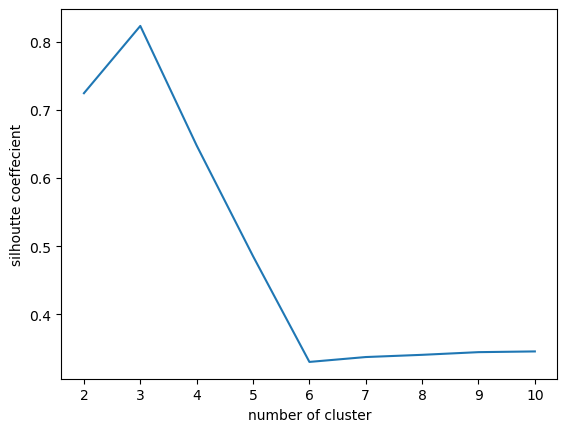

In [24]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("silhoutte coeffecient")
plt.show()